### Import libraries

In [82]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

I will train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [83]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

In [84]:
print("Train data shape:")
print(X_train.shape, Y_train.shape)
print("The X_train represents an array of 60000 matrices of 28 x 28 integers")
print("The Y_train represents an array of 60000 elements")

print("X_train.dtype:",X_train.dtype)
print("Y_train.dtype:", Y_train.dtype)

print(X_test.shape, Y_test.shape)
print("The X_test represents an array of 10000 matrices of 28 x 28 integers")
print("The Y_test represents an array of 60000 elements")

print("X_test.dtype:",X_test.dtype )
print("Y_test.dtype:", Y_test.dtype)


label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Train data shape:
(60000, 28, 28) (60000,)
The X_train represents an array of 60000 matrices of 28 x 28 integers
The Y_train represents an array of 60000 elements
X_train.dtype: uint8
Y_train.dtype: uint8
(10000, 28, 28) (10000,)
The X_test represents an array of 10000 matrices of 28 x 28 integers
The Y_test represents an array of 60000 elements
X_test.dtype: uint8
Y_test.dtype: uint8


Fashion MNIST images have one of 10 possible labels (shown above).

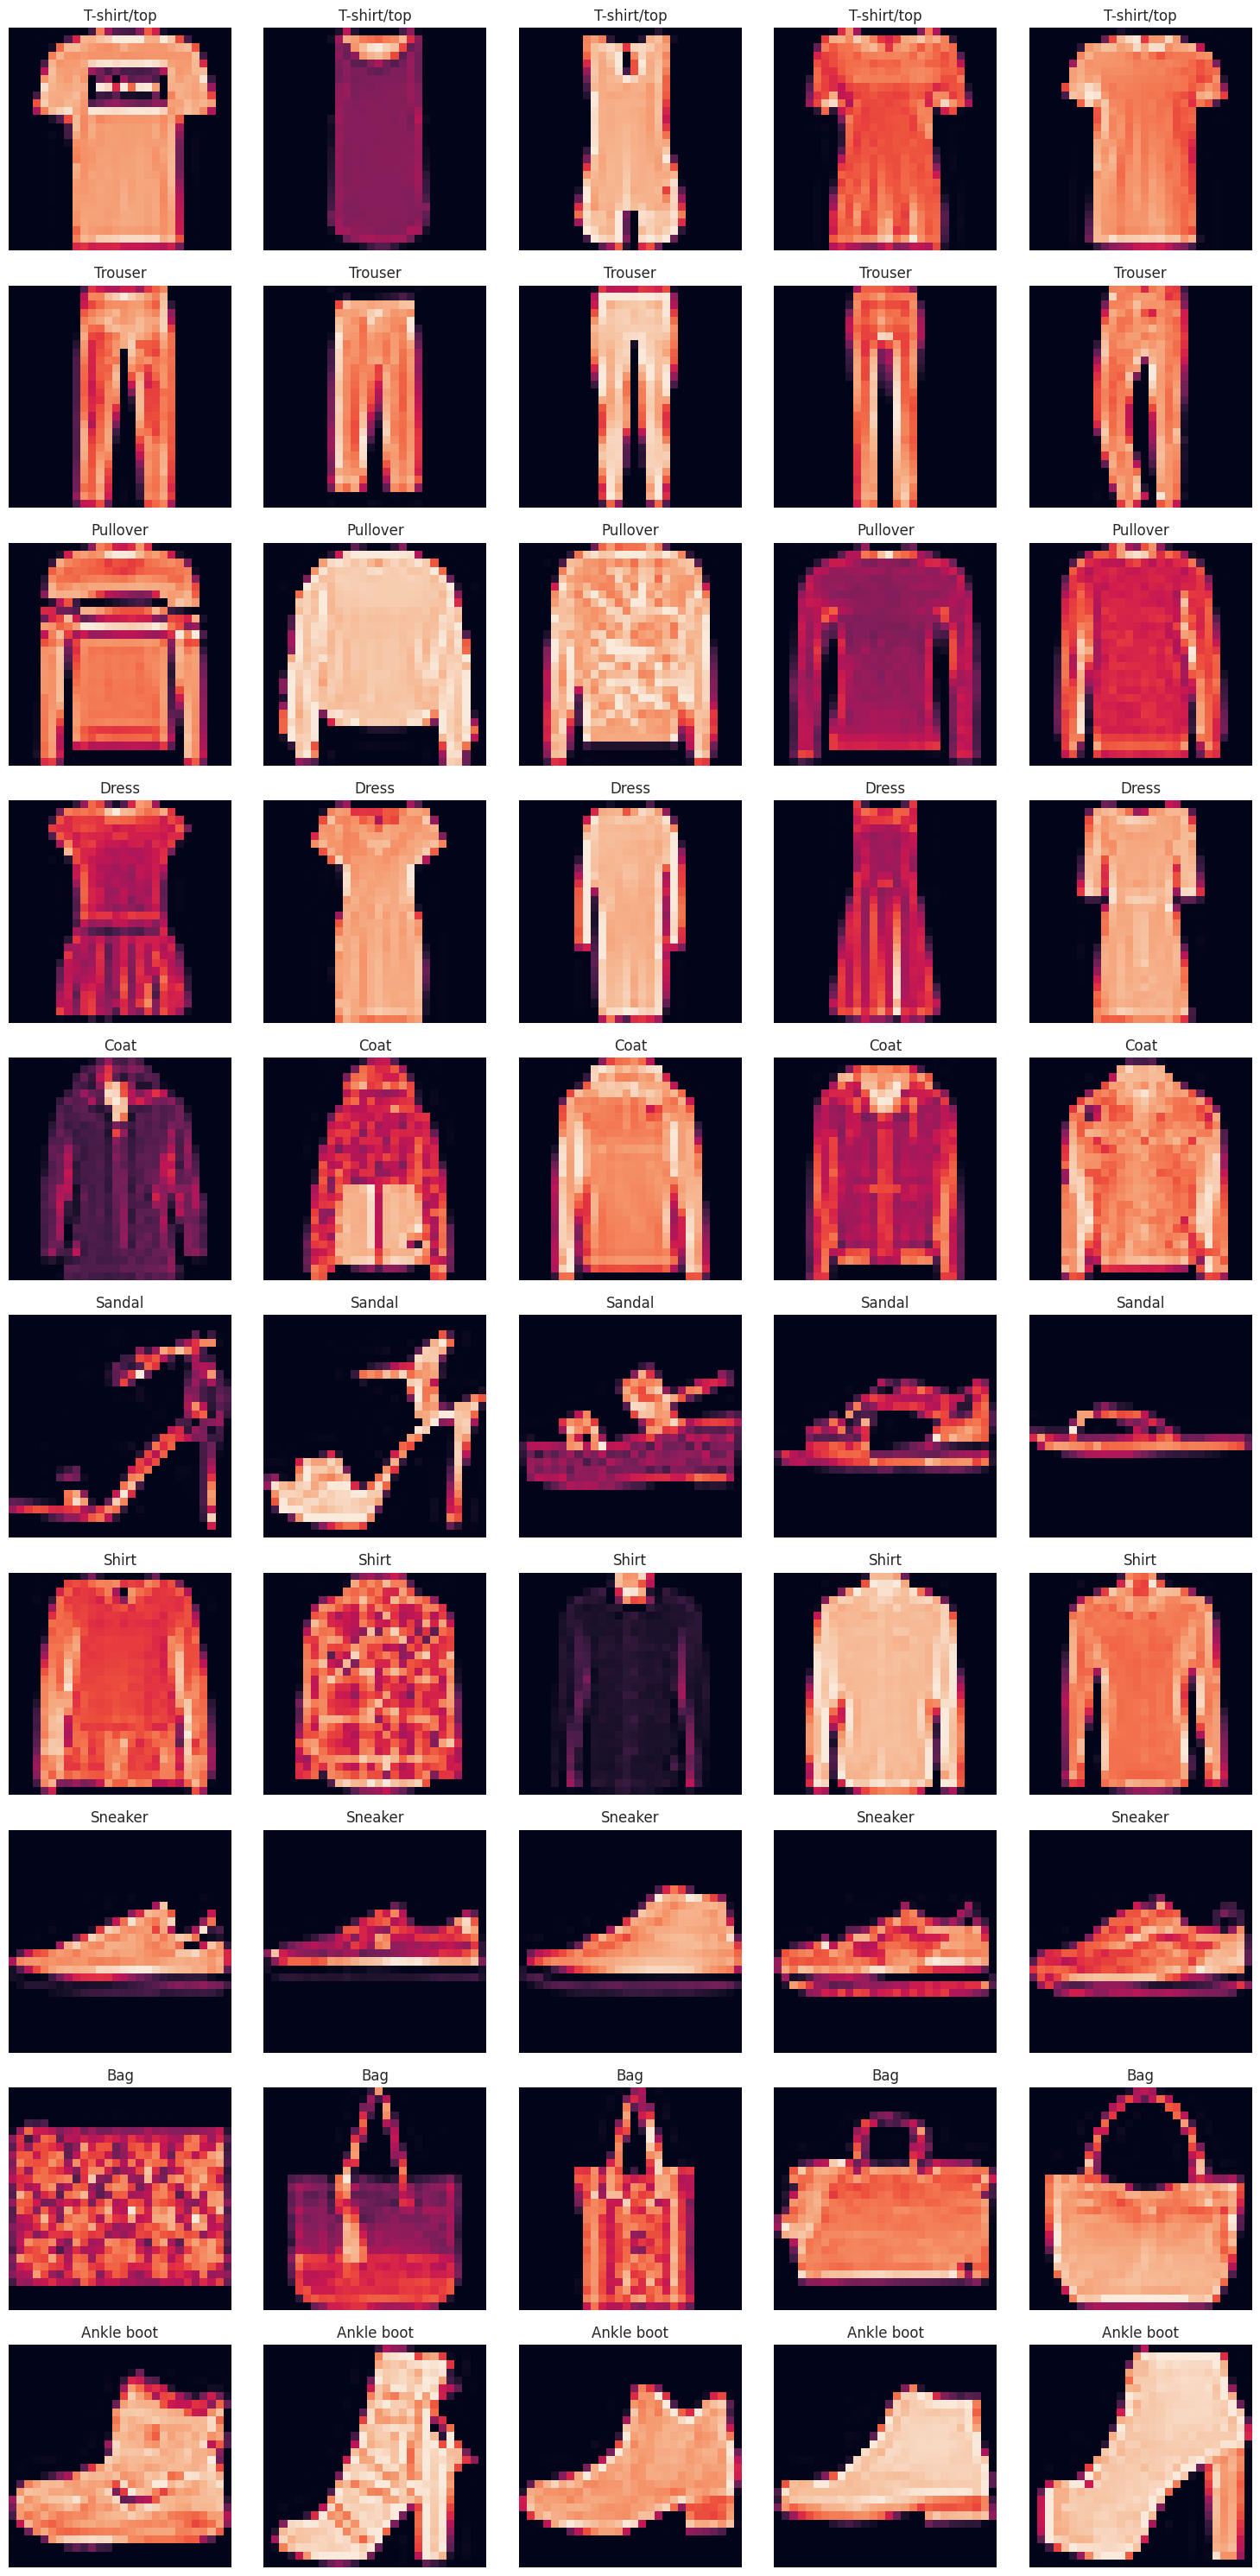

Minimum pixel value: 0, Maximum pixel value: 255


In [85]:
# Function to find first 5 images per class and display them
def display_first_5_images_per_class(X_train, Y_train, num_classes=10):
    plt.figure(figsize=(15, 30))

    for class_id in range(num_classes):

        class_indices = np.where(Y_train == class_id)[0][:5]

        for i, idx in enumerate(class_indices):
            plt.subplot(num_classes, 5, class_id * 5 + i + 1)
            plt.imshow(X_train[idx])
            plt.title(label_names[class_id])
            plt.axis('off')

    plt.tight_layout()
    plt.show()

display_first_5_images_per_class(X_train, Y_train, 10)

# Function to find min and max pixel values
def get_min_max_pixel_values(X_train):
    min_pixel_value = np.min(X_train)
    max_pixel_value = np.max(X_train)
    return min_pixel_value, max_pixel_value

min_pixel, max_pixel = get_min_max_pixel_values(X_train)
print(f"Minimum pixel value: {min_pixel}, Maximum pixel value: {max_pixel}")

---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms.

In [86]:
# Nomarlize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to a 1-D array
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [87]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

print("Unique values before conversion:", np.unique(Y_train))

Y_train = np.where(Y_train == 7, 1, 0)
Y_test = np.where(Y_test == 7, 1, 0)

print("Unique values after conversion:", np.unique(Y_train))



Unique values before conversion: [0 1 2 3 4 5 6 7 8 9]
Unique values after conversion: [0 1]


In [88]:
# YOUR CODE HERE
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

print("X_train_mini shape:", X_train_mini.shape)
print("X_val shape:", X_val.shape)
print("Y_train_mini shape:", Y_train_mini.shape)
print("Y_val shape:", Y_val.shape)

X_train_mini shape: (48000, 784)
X_val shape: (12000, 784)
Y_train_mini shape: (48000,)
Y_val shape: (12000,)


In [89]:
np.random.seed(0)

shuffled_indices = np.random.permutation(len(X_train_mini))
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

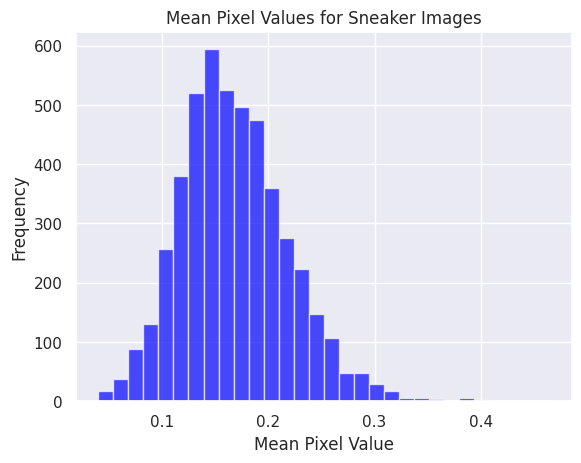

Mean pixel value across all sneaker images: 0.1682747275993731


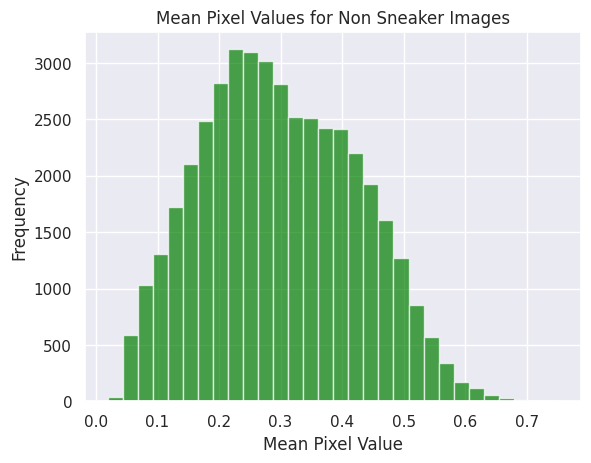

Mean pixel value across all non-sneaker images: 0.2990019268123916


In [90]:
# X_train_mini_sneaker
X_train_mini_sneaker = X_train_mini[Y_train_mini == 1]
mean_sneaker_pixels = np.mean(X_train_mini_sneaker, axis=1)
plt.hist(mean_sneaker_pixels, bins=30, color='blue', alpha=0.7)
plt.title("Mean Pixel Values for Sneaker Images")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.show()
print("Mean pixel value across all sneaker images:", np.mean(mean_sneaker_pixels))


# X_train_mini_non_sneaker
X_train_mini_non_sneaker = X_train_mini[Y_train_mini == 0]
mean_non_sneaker_pixels = np.mean(X_train_mini_non_sneaker, axis=1)
plt.hist(mean_non_sneaker_pixels, bins=30, color='green', alpha=0.7)
plt.title("Mean Pixel Values for Non Sneaker Images")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.show()
print("Mean pixel value across all non-sneaker images:", np.mean(mean_non_sneaker_pixels))



# Sneakers have lower mean value of 0.17
# Non-snakers have higher mean value of 0.30
# the histogram shows the overlap between sneaker and non-sneaker pixel distributions
# around from 0 to 0.3
# pixel values may not be sufficient for classification.



---
### Step 4: Modeling

In [91]:

print("number of sneakers in Y train_mini:", np.sum(Y_train_mini == 1))
print("number of non-sneakers in Y train_mini:", np.sum(Y_train_mini == 0))

# 1: 4800
# 2: 43200
# 3: The majority class is non-sneaker
# 4: accuracy = 43200 /48000 = 0.9 => 90%


def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def log_loss(Y, Y_hat):
  return (-Y * np.log(Y_hat) - (1 - Y) * np.log(1 - Y_hat)).mean()

log_loss_Y_train_mini = log_loss(Y_train_mini, 0.1)
log_loss_Y_val = log_loss(Y_val, 0.1)

print("log_loss_Y_train_mini", log_loss_Y_train_mini)
print("log_loss_Y_val", log_loss_Y_val)


number of sneakers in Y train_mini: 4800
number of non-sneakers in Y train_mini: 43200
log_loss_Y_train_mini 0.3250829733914482
log_loss_Y_val 0.3250829733914482


In [92]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=[num_features],  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer,    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate),

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(
      optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=[tf.keras.metrics.BinaryAccuracy()]
  )

  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

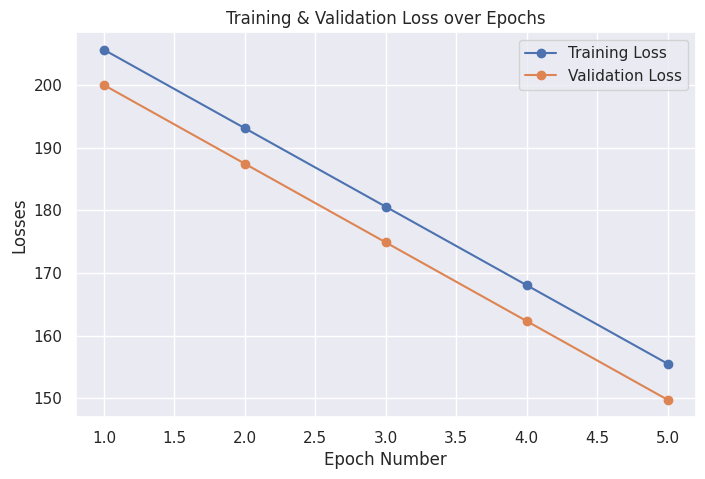

In [93]:
tf.random.set_seed(0)
# 2. Build and compile model
model_tf = build_model(
    num_features=X_train_mini.shape[1],
    learning_rate=0.0001
)
model_tf.summary()

# 3. Fit the model
fit_tf = model_tf.fit(
    x = X_train_mini,
    y = Y_train_mini,
    validation_data=(X_val, Y_val),
    epochs=5,
    batch_size=32,
    verbose=0)

# 4. Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), fit_tf.history['loss'], label='Training Loss', marker='o')
plt.plot(range(1, 6), fit_tf.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch Number')
plt.ylabel('Losses')
plt.title('Training & Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


---
### Step 5: Hyperparameter tuning

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.7437 - loss: 22.0709 - val_binary_accuracy: 0.9438 - val_loss: 0.2328
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9492 - loss: 0.2005 - val_binary_accuracy: 0.9558 - val_loss: 0.1402
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.9597 - loss: 0.1323 - val_binary_accuracy: 0.9626 - val_loss: 0.1046
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9659 - loss: 0.1026 - val_binary_accuracy: 0.9681 - val_loss: 0.0863
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.9709 - loss: 0.0862 - val_binary_accuracy: 0.9707 - val_loss: 0.0754
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9739 - loss: 0.0761 - val_binary_accuracy: 0.9732 - val_loss: 0.0684


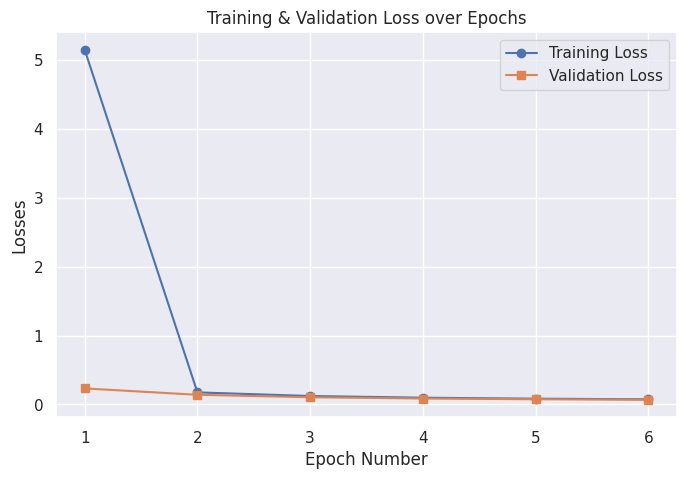

Loss at the final epoch on training set: 0.074832
Loss at the final epoch on validation set: 0.068396
Percentage difference between train and val loss: 8.599706
Training Loss Improvement (%): 76.980797
Validation Loss Improvement (%): 78.960381
First five learned parameters (including bias):
[0.99981   0.9992939 0.9959551 0.9886777]
[-2.2603047]


In [94]:
tf.random.set_seed(0)
# 2. Build and compile model
model_tf = build_model(
    num_features=X_train_mini.shape[1],
    learning_rate=0.04
)
model_tf.summary()

# 3. Fit the model
fit_tf = model_tf.fit(
    x = X_train_mini,
    y = Y_train_mini,
    validation_data=(X_val, Y_val),
    epochs=6,
    batch_size=32,
    verbose=1)

# Extract loss values
train_loss = fit_tf.history['loss']
val_loss = fit_tf.history['val_loss']

# 4. Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epoch Number')
plt.ylabel('Losses')
plt.title('Training & Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

loss_tf = fit_tf.history['loss'][-1]
val_loss_tf = fit_tf.history['val_loss'][-1]
print(f"Loss at the final epoch on training set: {loss_tf:.6f}")
print(f"Loss at the final epoch on validation set: {val_loss_tf:.6f}")

loss_diff_percentage = abs((loss_tf - val_loss_tf) / loss_tf) * 100
print(f"Percentage difference between train and val loss: {loss_diff_percentage:.6f}")

train_improvement = (log_loss_Y_train_mini - loss_tf) / log_loss_Y_train_mini * 100
val_improvement = (log_loss_Y_val - val_loss_tf) / log_loss_Y_val * 100
print(f"Training Loss Improvement (%): {train_improvement:.6f}")
print(f"Validation Loss Improvement (%): {val_improvement:.6f}")

weights, bias = model_tf.layers[0].get_weights()
weights_flat = weights.flatten()
bias_flat = bias.flatten()
print("First five learned parameters (including bias):")
print(weights_flat[:4])
print(bias_flat[:1])

# the TensorFlow model demonstrated an improvement over the baseline model by 77 % (training)


---
### Step 6: Evaluation and Generalization

In [95]:
train_loss, train_accuracy = model_tf.evaluate(X_train_mini, Y_train_mini)
test_loss, test_accuracy = model_tf.evaluate(X_test, Y_test)

print(f"Aggregate training accuracy: {train_accuracy:.4f}")
print(f"Aggregate test accuracy: {test_accuracy:.4f}")

# The model performs well on both the training and test datasets.
# They both have high accuracy above 90% and both are similar,
# so the model demostrates generalization capabilities.

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9756 - loss: 0.0691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9749 - loss: 0.0676
Aggregate training accuracy: 0.9760
Aggregate test accuracy: 0.9743


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


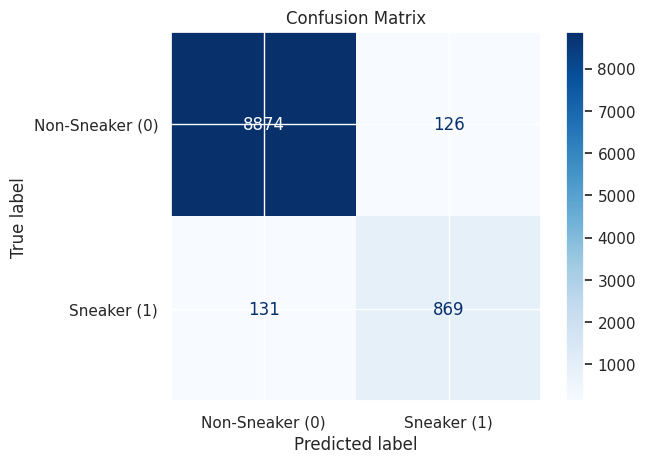

True Positives (TP): 869
False Negatives (FN): 131
False Positives (FP): 126
True Negatives (TN): 8874
Sneaker Accuracy: 0.8690
Non-Sneaker Accuracy: 0.9860


In [96]:
Y_test_pred_tf = model_tf.predict(X_test).flatten()
Y_test_pred_labels = np.where(Y_test_pred_tf >= 0.5, 1, 0)

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred_labels)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Sneaker (0)", "Sneaker (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Extract and Print TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()
print(f"True Positives (TP): {TP}")
print(f"False Negatives (FN): {FN}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")

# Calculate accuracy
sneaker_accuracy = TP / (TP + FN)
non_sneaker_accuracy = TN / (TN + FP)
print(f"Sneaker Accuracy: {sneaker_accuracy:.4f}")
print(f"Non-Sneaker Accuracy: {non_sneaker_accuracy:.4f}")
# Sneaker accuracy is much lower than non-sneaker accuracy
# this suggests the model misclassified sneakers more often than non-sneakers.


# The model does not demonstrate strong subgroup generalization capabilities
# The difference between the two accuracy is 11.7%.
# Sneakers are misclassified more often.

